In [2]:
import numpy as np
import os
os.chdir("..")
from eim import eim,eim_vectorial,eim_vect
import matplotlib.pyplot as plt

## First function

In [13]:
def f_real(x,mu):
    return mu*x

N=6
x_values = np.linspace(0,10,num=N)
Nmu=10
M = np.linspace(0,1,Nmu)

e = eim(f_real,x_values,M)

10.0 error in 0.0003101825714111328 s 
 we have a 1-kolmogorov-width with a final error of 8.881784197001252e-16, dimensionality reduction : 0.1  


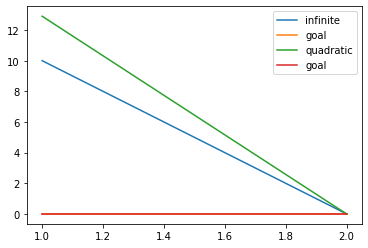

In [14]:
e.reach_precision()

In [5]:
np.linalg.matrix_rank(e.Z)

1

Comme attendu par nos calculs à la main, l'algorithme eim converge bien en une étape

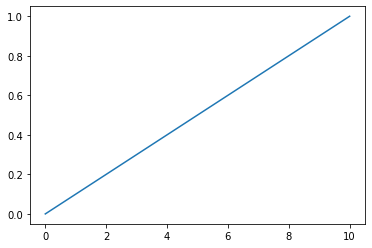

In [26]:
for k in range(len(e.Q_tab)):
    plt.plot(e.x_values,e.Q_tab[k])

## second function

In [30]:
def f_real(x,mu):
    return np.exp(-mu*x)

N=100
x_values = np.linspace(0,10,num=N)
Nmu=100
M = np.linspace(0,1,Nmu)

e = eim(f_real,x_values,M)

1.0 error in 0.00619196891784668 s 
0.9999546000702375 error in 0.033467769622802734 s 
0.42024656475482636 error in 0.014070987701416016 s 
0.06366990535533455 error in 0.013125896453857422 s 
 we have a 4-kolmogorov-width with a final error of 0.007961965804512916, dimensionality reduction : 0.04  


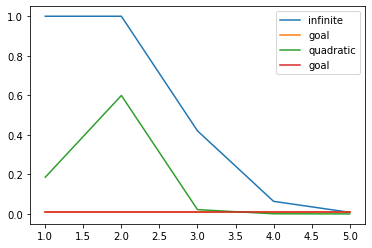

In [31]:
e.reach_precision()

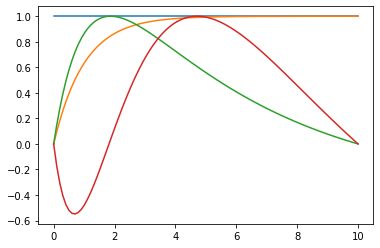

In [32]:
for k in range(len(e.Q_tab)):
    plt.plot(e.x_values,e.Q_tab[k])

1.0 error in 0.0034339427947998047 s 


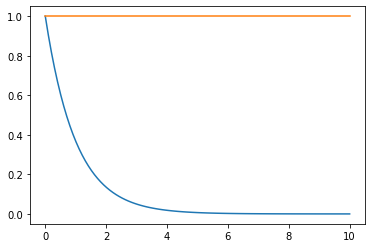

No handles with labels found to put in legend.


0.9999546000702375 error in 1.1625711917877197 s 


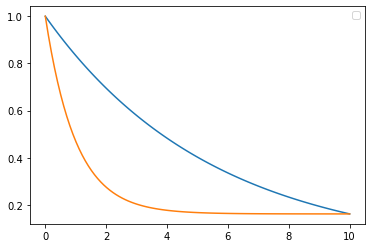

No handles with labels found to put in legend.


0.42024656475482636 error in 1.125945806503296 s 


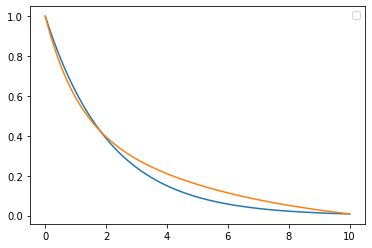

No handles with labels found to put in legend.


0.06366990535533455 error in 1.1407396793365479 s 


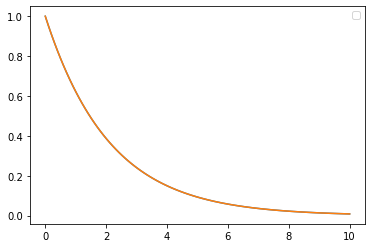

No handles with labels found to put in legend.


 we have a 4-kolmogorov-width with a final error of 0.007961965804512916, dimensionality reduction : 0.04  


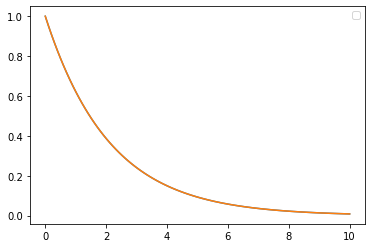

No handles with labels found to put in legend.


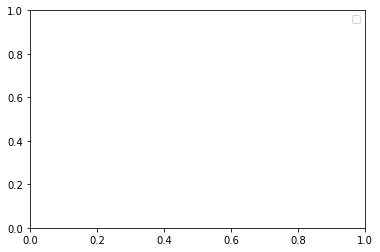

In [33]:
e.reach_precision(nb_iter=10,period=1)

Dans ce second cas l'algorithme ne converge pas en une étape, car la fonction fmu est moins linéaire.

1.0 error in 0.0031020641326904297 s 
0.9999546000702375 error in 0.027420520782470703 s 
0.42024656475482636 error in 0.013716697692871094 s 
0.06366990535533455 error in 0.013434171676635742 s 
0.007961965804512916 error in 0.013339042663574219 s 
0.005180378471846603 error in 0.013947248458862305 s 
0.00012087470224697583 error in 0.015785932540893555 s 
2.123755155228346e-05 error in 0.014801263809204102 s 
2.0358570317347002e-06 error in 0.015236616134643555 s 
2.792712860515134e-07 error in 0.015977144241333008 s 
5.104342781780957e-09 error in 0.016909122467041016 s 
1.6357730725502506e-09 error in 0.018160581588745117 s 
2.288960687657493e-11 error in 0.01859736442565918 s 
1.3320078547096603e-12 error in 0.020775318145751953 s 
5.6288307348495437e-14 error in 0.021619558334350586 s 
 we have a 15-kolmogorov-width with a final error of 2.873786278390078e-15, dimensionality reduction : 0.15  


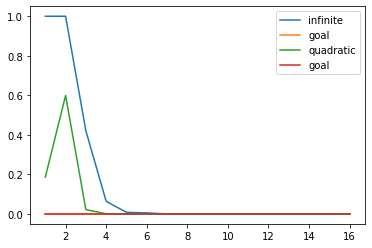

In [35]:
e.reach_precision(epsilon=1e-14)

on remarque que si on augmente la precision epsilon, la dimension de l'espace de fonction augment

## less continious function

In [40]:
def f_real(x,mu):    
    return (x**mu)*mu
    
N=100
x_values = np.linspace(0,10,num=N)
Nmu=100
M = np.linspace(1,4,Nmu)

e = eim(f_real,x_values,M)

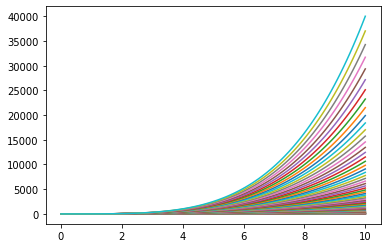

In [41]:
for mu in M:
    plt.plot(x_values,f_real(x_values,mu),label=f"mu ={mu}")

40000.0 error in 0.0019719600677490234 s 
554.9943687193045 error in 0.018477916717529297 s 
25.80674348543039 error in 0.013799190521240234 s 
1.9702656763901611 error in 0.01493692398071289 s 
0.5620663571135083 error in 0.014075279235839844 s 
0.24130274057357098 error in 0.013727426528930664 s 
0.01942819935867615 error in 0.014181137084960938 s 
 we have a 7-kolmogorov-width with a final error of 0.00416952322831321, dimensionality reduction : 0.07  


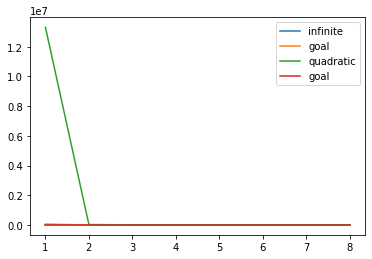

In [42]:
e.reach_precision()

Meme pour une fonction moins linéaire que les précedentes l'algo convergent

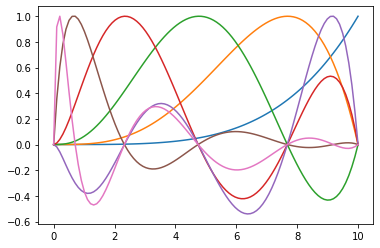

In [43]:
for k in range(len(e.Q_tab)):
    plt.plot(e.x_values,e.Q_tab[k])

## EIM vectorial

In [3]:
def u1(x,y):
    return np.array([-y*(1-x**2),x*(1-y**2)])

def u2(x,y):
    n = np.sqrt(x**2 + y**2)
    return np.array([-y*np.exp(-n/2),x*np.exp(-n/2)])

def f(x,y,mu):
    return (mu*u1(x,y) + (1-mu)*u2(x,y)).T

In [4]:
N=101
x_values = np.linspace(-1,1,num=N)
y_values = x_values

Nmu=100
M = np.linspace(0,1,Nmu)

In [5]:
X = np.array(np.meshgrid(x_values, y_values)).T.reshape(-1,2)

In [6]:
Z = np.zeros((M.shape[0],X.shape[0],2))

for i in range(M.shape[0]):
    arg = tuple(X.T)+tuple([M[i]])
    Z[i] = f(*arg)

In [7]:
Z.shape

(100, 10201, 2)

In [8]:
ev = eim_vectorial(Z)

1.0 error in 0.7427821159362793 s 
0.4930686913952398 error in 2.1457667350769043 s 
 we have a 2-kolmogorov-width with a final error of 2.220446049250313e-16, dimensionality reduction : 0.02  


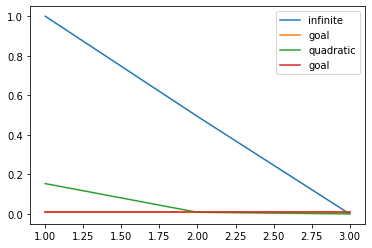

In [9]:
ev.reach_precision()

In [10]:
np.linalg.matrix_rank(ev.Z)

array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])